<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Paso 1. Acceda los datos y prepáralos para el análisis

### Cargo los datasets 

In [2]:
visitas = pd.read_csv('/datasets/visits_log_us.csv')
ordenes = pd.read_csv('/datasets/orders_log_us.csv')
costos = pd.read_csv('/datasets/costs_us.csv')

### Veo la informacion de cada dataset

In [3]:
print(visitas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


In [4]:
print(ordenes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [5]:
print(costos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


### Optimizo los datos para el análisis.

In [6]:
visitas['Start Ts'] = pd.to_datetime(visitas['Start Ts'])
visitas['End Ts'] = pd.to_datetime(visitas['End Ts'])
visitas['Device'] = visitas['Device'].astype('category')
visitas['Source Id'] = visitas['Source Id'].astype('category')
print(visitas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  category      
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(2), datetime64[ns](2), uint64(1)
memory usage: 8.9 MB
None


Start Ts y End Ts: son fechas y horas → los convertimos a datetime64 para poder calcular duración de la sesión, agrupar por fecha, filtrar por mes, etc.

Device: contiene texto con pocos valores posibles (ej. 'mobile', 'desktop') → lo pasamos a category para ahorrar memoria y acelerar análisis agrupados.

Source Id: es un ID de canal de adquisición → no se comporta como un número, sino como una etiqueta → mejor como category.

In [7]:
ordenes['Buy Ts'] = pd.to_datetime(ordenes['Buy Ts'])
ordenes['Uid'] = ordenes['Uid'].astype('category')
print(ordenes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 2.2 MB
None


Buy Ts: es fecha y hora de compra → necesitamos datetime64 para analizar el momento de la primera compra o compras por día.

Uid: como es un ID de usuario repetido en distintas órdenes → lo pasamos a category para hacer agrupaciones más rápidas (por usuario).

In [8]:
costos['dt'] = pd.to_datetime(costos['dt'])
costos['source_id'] = costos['source_id'].astype('category')
print(costos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   category      
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1)
memory usage: 42.7 KB
None


dt: indica la fecha del gasto en publicidad → datetime64 nos permitirá hacer análisis por día, mes, comparar con pedidos, etc.

source_id: representa la fuente del anuncio → al ser etiquetas, mejor como category.

### Revisamos valores nulos y duplicados

In [9]:
print("VALORES NULOS - VISITAS")
print(visitas.isnull().sum())

print("\nVALORES NULOS - ORDENES")
print(ordenes.isnull().sum())

print("\nVALORES NULOS - COSTOS")
print(costos.isnull().sum())

VALORES NULOS - VISITAS
Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

VALORES NULOS - ORDENES
Buy Ts     0
Revenue    0
Uid        0
dtype: int64

VALORES NULOS - COSTOS
source_id    0
dt           0
costs        0
dtype: int64


In [10]:
print("DUPLICADOS - VISITAS:", visitas.duplicated().sum())
print("DUPLICADOS - ORDENES:", ordenes.duplicated().sum())
print("DUPLICADOS - COSTOS:", costos.duplicated().sum())

DUPLICADOS - VISITAS: 0
DUPLICADOS - ORDENES: 0
DUPLICADOS - COSTOS: 0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los datos fueron revisados y modificados apropiadamente, ahora se puede empezar a trabajar con ellos comodomente, con la grafica ya podemos empezar a entender un poco mejor los datos
</div>


# Paso 2. Haz informes y calcula métricas 

## Visitas

### ¿Cuántas personas lo usan cada día, semana y mes?

In [11]:
# Extraer períodos
visitas['fecha'] = visitas['Start Ts'].dt.date
visitas['semana'] = visitas['Start Ts'].dt.to_period('W').apply(lambda r: r.start_time)
visitas['mes'] = visitas['Start Ts'].dt.to_period('M').astype(str)

# Usuarios únicos por periodo
usuarios_dia = visitas.groupby('fecha')['Uid'].nunique()
usuarios_semana = visitas.groupby('semana')['Uid'].nunique()
usuarios_mes = visitas.groupby('mes')['Uid'].nunique()

print(usuarios_dia)
print(usuarios_semana)
print(usuarios_mes)

fecha
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: Uid, Length: 364, dtype: int64
semana
2017-05-29     2021
2017-06-05     4129
2017-06-12     2812
2017-06-19     2878
2017-06-26     3064
2017-07-03     3294
2017-07-10     4355
2017-07-17     3841
2017-07-24     2655
2017-07-31     2364
2017-08-07     2444
2017-08-14     2746
2017-08-21     3116
2017-08-28     3694
2017-09-04     4412
2017-09-11     4319
2017-09-18     4874
2017-09-25     6241
2017-10-02     7612
2017-10-09     7074
2017-10-16     7148
2017-10-23     7401
2017-10-30     7480
2017-11-06     7179
2017-11-13     8117
2017-11-20    10586
2017-11-27     8166
2017-12-04     8407
2017-12-11     8214
2017-12-18     7172
2017-12-25     7774
2018-01-01     6918
2018-01-08     6703
2018-01-15     6972
2018-01-22     7060
2018-01-29     8111
2018-02-05     7908
2

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de hacer las agrupaciones
</div>


### ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [12]:
sesiones_dia = visitas.groupby('fecha').size()

print(sesiones_dia)

fecha
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
              ... 
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256
Length: 364, dtype: int64


### ¿Cuál es la duración de cada sesión?

In [13]:
visitas['duracion_sesion'] = (visitas['End Ts'] - visitas['Start Ts']).dt.total_seconds()
print(visitas['duracion_sesion'])

0         1080.0
1         1680.0
2            0.0
3         1440.0
4            0.0
           ...  
359395      19.0
359396      19.0
359397      19.0
359398      19.0
359399      19.0
Name: duracion_sesion, Length: 359400, dtype: float64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Me parece acertada la manera de responder a las preguntas pasadas
</div>


### ¿Con qué frecuencia los usuarios regresan?

In [14]:
visitas_ordenadas = visitas.sort_values(by=['Uid', 'Start Ts'])

visitas_ordenadas['dias_entre_visitas'] = visitas_ordenadas.groupby('Uid')['Start Ts'].diff().dt.days

frecuencia = visitas_ordenadas['dias_entre_visitas'].dropna()

print(frecuencia.describe())

count    131231.000000
mean         27.676837
std          49.693727
min           0.000000
25%           0.000000
50%           4.000000
75%          31.000000
max         362.000000
Name: dias_entre_visitas, dtype: float64


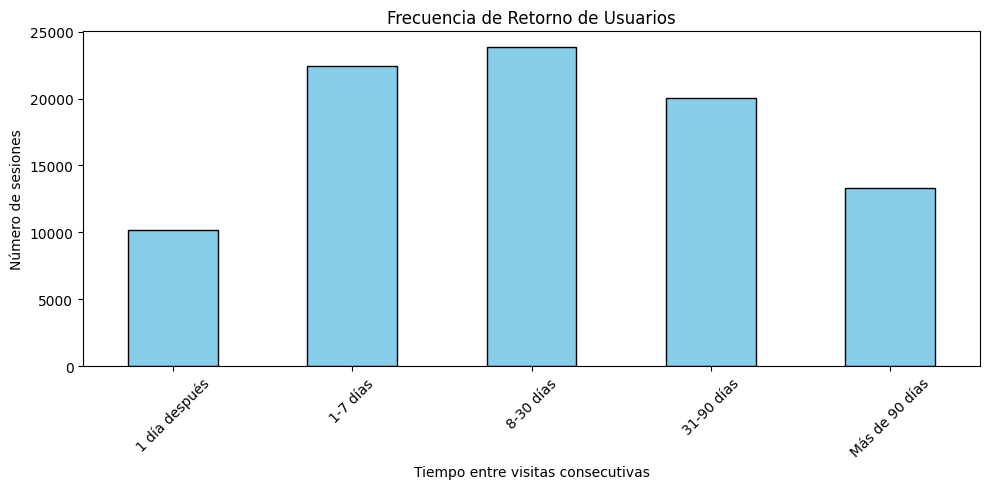

In [15]:
# Ajustar los bins (sin duplicados)
bins = [0, 1, 7, 30, 90, np.inf]
labels = ['1 día después', '1-7 días', '8-30 días', '31-90 días', 'Más de 90 días']

frecuencia_categorizada = pd.cut(frecuencia, bins=bins, labels=labels, right=True)

# Contar usuarios por categoría
conteo_categorias = frecuencia_categorizada.value_counts().sort_index()

plt.figure(figsize=(10, 5))
conteo_categorias.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frecuencia de Retorno de Usuarios')
plt.xlabel('Tiempo entre visitas consecutivas')
plt.ylabel('Número de sesiones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


La mayoría de usuarios regresan dentro de la primera semana.

Hay una buena cantidad que regresa incluso después de 30 o 90 días, lo cual puede indicar retención a largo plazo o usuarios que solo vuelven ocasionalmente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Con esta grafica podemos ver claramente el retorno de los usuarios y crear estrategas para reducir el tiempo de retorno
</div>


# 2 Ventas

### ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)

In [16]:
# Obtenemos la primera visita de cada usuario
primer_visita = visitas.groupby('Uid')['Start Ts'].min().reset_index()
primer_visita.columns = ['Uid', 'registro']

# Obtenemos la primera compra de cada usuario
primera_compra = ordenes.groupby('Uid')['Buy Ts'].min().reset_index()
primera_compra.columns = ['Uid', 'primera_compra']

# Unimos las dos tablas para comparar registro vs compra:
conversion = primer_visita.merge(primera_compra, on='Uid', how='inner')

# Calculamos los días que tardaron en comprar
conversion['dias_para_convertir'] = (conversion['primera_compra'] - conversion['registro']).dt.days

# Clasificamos en cohortes (0d, 1d, etc.)
conversion['cohorte_conversion'] = conversion['dias_para_convertir'].astype(str) + 'd'

# Contamos cuántos usuarios hay en cada cohorte
cohortes_conversion = conversion['cohorte_conversion'].value_counts().sort_index()

print(cohortes_conversion)

0d      26363
100d       31
101d       23
102d       21
103d       16
        ...  
96d        26
97d        32
98d        32
99d        27
9d        140
Name: cohorte_conversion, Length: 345, dtype: int64


### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [17]:
# Decidi ver cuantos hicieron por mes
ordenes['mes'] = ordenes['Buy Ts'].dt.to_period('M')
pedidos_por_mes = ordenes.groupby('mes').size()
print(pedidos_por_mes)

mes
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
2017-11    5659
2017-12    6218
2018-01    4721
2018-02    5281
2018-03    5326
2018-04    3273
2018-05    4346
2018-06       1
Freq: M, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de agrupar y odernar la información
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Pienso que este tipo de datos se pueden visualizar mejor en una grafica, ya que podemos ver mas claramente las variaciones entre cada uno de los meses
</div>


### ¿Cuál es el tamaño promedio de compra?


In [18]:
tamaño_promedio_compra = ordenes['Revenue'].mean()
print(f'Tamaño promedio de compra: ${tamaño_promedio_compra:.2f}')

Tamaño promedio de compra: $5.00


### ¿Cuánto dinero traen? (LTV)

In [19]:
ltv = ordenes.groupby('Uid')['Revenue'].sum()

# Ver el LTV promedio de todos los usuarios
ltv_promedio = ltv.mean()
print(f'LTV promedio por usuario: ${ltv_promedio:.2f}')


LTV promedio por usuario: $6.90


# 3 Costos (datos sobre gastos de marketing)

### ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)

In [20]:
#Total gastado
total_gastado = costos['costs'].sum()
print(f"Total gastado en marketing: ${total_gastado:.2f}")


Total gastado en marketing: $329131.62


In [21]:
#Gastos por fuente
gasto_por_fuente = costos.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print(gasto_por_fuente)


source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


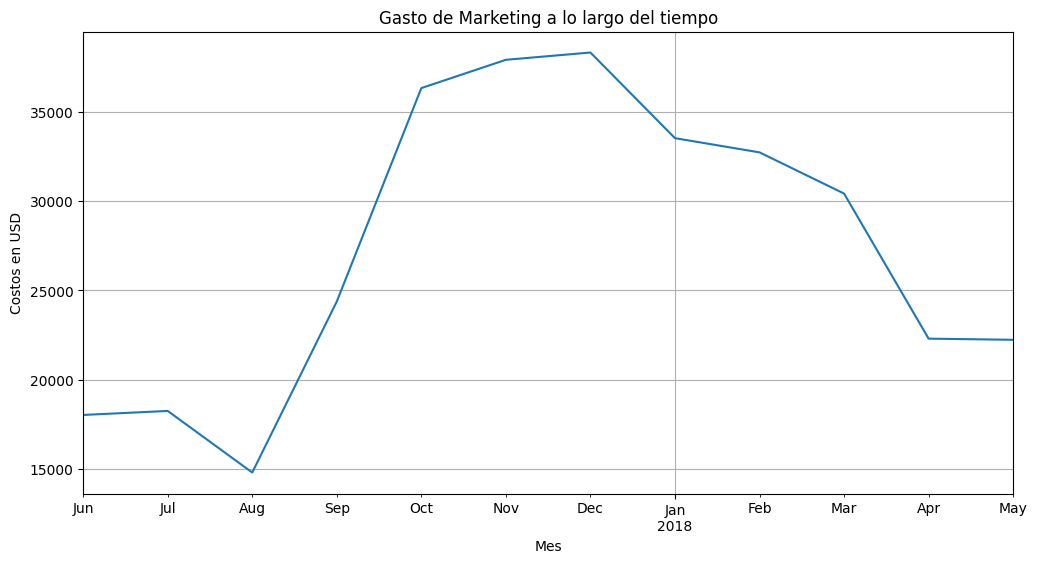

In [22]:
# Gastos a lo largo del tiempo (por mes)
costos['mes'] = costos['dt'].dt.to_period('M')
gasto_por_mes = costos.groupby('mes')['costs'].sum()

# Visualizar
plt.figure(figsize=(12,6))
gasto_por_mes.plot()
plt.title('Gasto de Marketing a lo largo del tiempo')
plt.ylabel('Costos en USD')
plt.xlabel('Mes')
plt.grid(True)
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Buena manera de crearSe puede observar que hay un fuerte incremento en los gastos de marketing a partir del segundo semestre del año
</div>


### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [23]:
# Primer fuente por usuario
primer_fuente = visitas.sort_values('Start Ts').drop_duplicates('Uid')[['Uid', 'Source Id']]

usuarios_por_fuente = primer_fuente['Source Id'].value_counts()

cac_por_fuente = (gasto_por_fuente / usuarios_por_fuente).dropna()
print(cac_por_fuente)

1     2.200155
2     2.429952
3     2.137480
4     0.844188
5     1.051183
9     0.855690
10    0.843472
dtype: float64


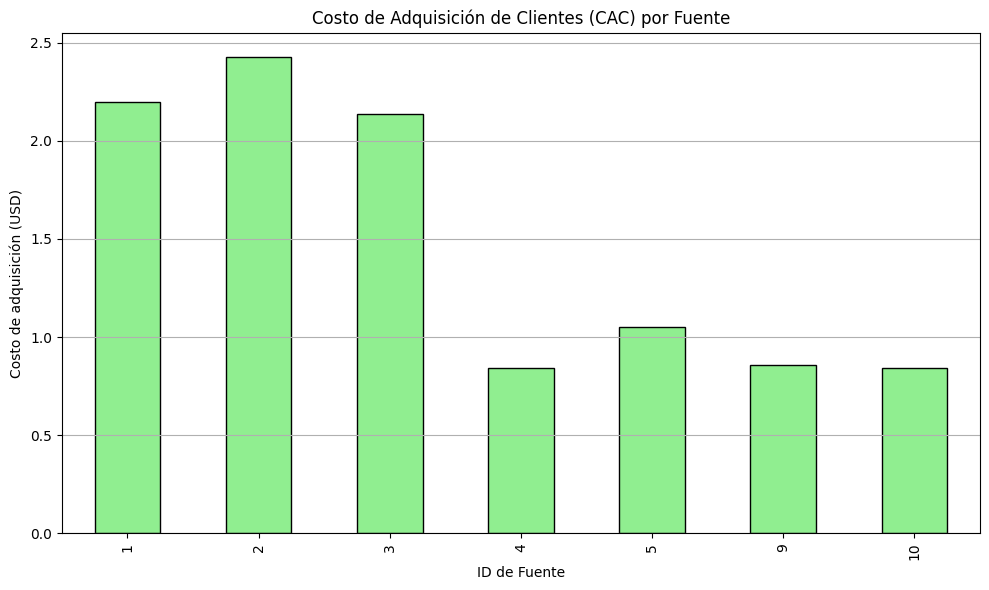

In [24]:
plt.figure(figsize=(10,6))
cac_por_fuente.sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')

plt.title('Costo de Adquisición de Clientes (CAC) por Fuente')
plt.xlabel('ID de Fuente')
plt.ylabel('Costo de adquisición (USD)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Fuentes 4, 9 y 10 son las más baratas para adquirir clientes (menos de 1 dólar).

Fuente 2 es la más cara (más de 2.40 USD por cliente).

Fuentes 1 y 3 también tienen un CAC relativamente alto.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Gracias a etsa grafica el equipo de marketing puede decidir una mejor estrategia de inversión, eliminando fuentes que no son tan buenas e inviertiendo más en otras que pueden dejar mejores resultados
</div>


### ¿Cuán rentables eran las inversiones? (ROMI)

Para calcular ROMI por fuente necesitamos:

Ingresos generados por usuarios de cada fuente

Costos invertidos en esa fuente

Ya tenemos los costos, ahora los ingresos.

In [25]:
# Unimos usuarios, su fuente de adquisición y sus ingresos

# Unimos primer fuente con ordenes
ordenes_fuente = ordenes.merge(primer_fuente, on='Uid', how='left')

# Ingresos por fuente
ingresos_por_fuente = ordenes_fuente.groupby('Source Id')['Revenue'].sum()

# Calculamos ROMI
romi_por_fuente = (ingresos_por_fuente - gasto_por_fuente) / gasto_por_fuente
print(romi_por_fuente)


1     0.492351
2     0.096191
3    -0.614275
4    -0.071664
5     0.016750
6          NaN
7          NaN
9     0.043844
10   -0.235665
dtype: float64


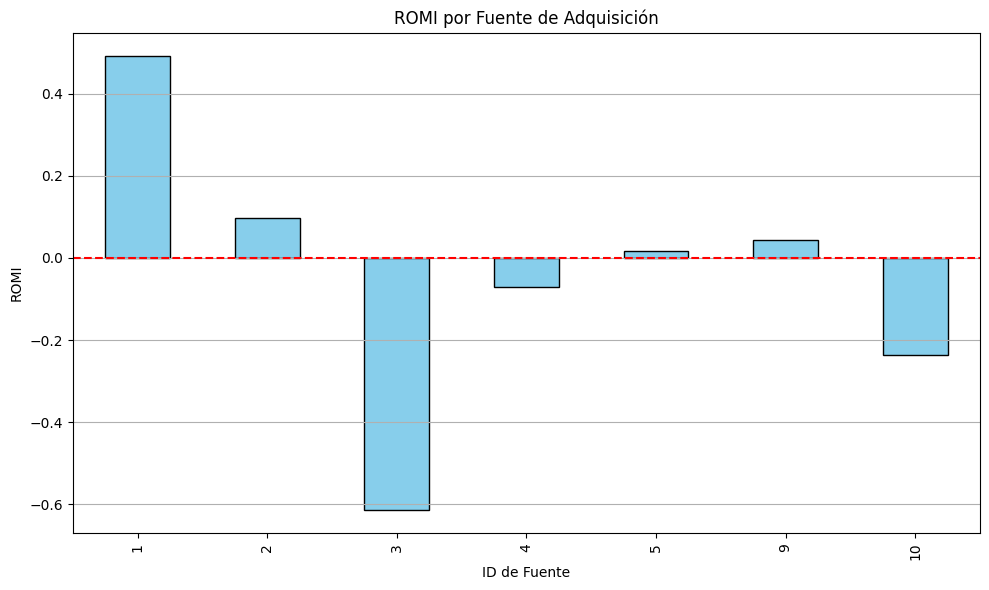

In [26]:
# Creamos gráfico de barras para el ROMI
plt.figure(figsize=(10,6))
romi_por_fuente.dropna().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('ROMI por Fuente de Adquisición')
plt.xlabel('ID de Fuente')
plt.ylabel('ROMI')
plt.axhline(0, color='red', linestyle='--')  # Línea roja en ROMI=0
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Fuente 1 es claramente la más rentable.

Fuente 2, 5 y 9 son marginalmente rentables, pero no mucho.

Fuente 3 y 10 no son rentables: deberías evaluar reducir presupuesto o mejorar las campañas.

Fuente 6 y 7 probablemente no generaron usuarios o ventas.



<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Bien hecho!

La grafica que has hecho me parece bastante buena, se interpreta de una manera sencilla y tiene un alto impacto visual
</div>


### cómo difieren estas métricas para varios dispositivos y fuentes de anuncios

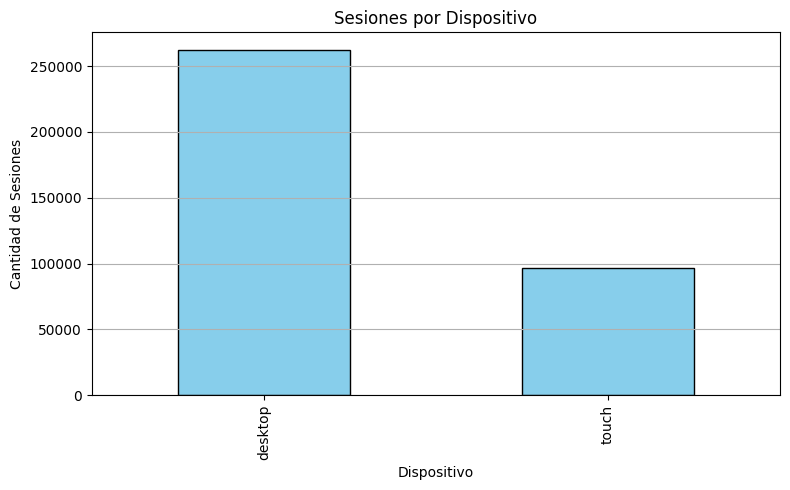

In [27]:
# Distribución de sesiones por dispositivo
plt.figure(figsize=(8,5))
visitas['Device'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sesiones por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Cantidad de Sesiones')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


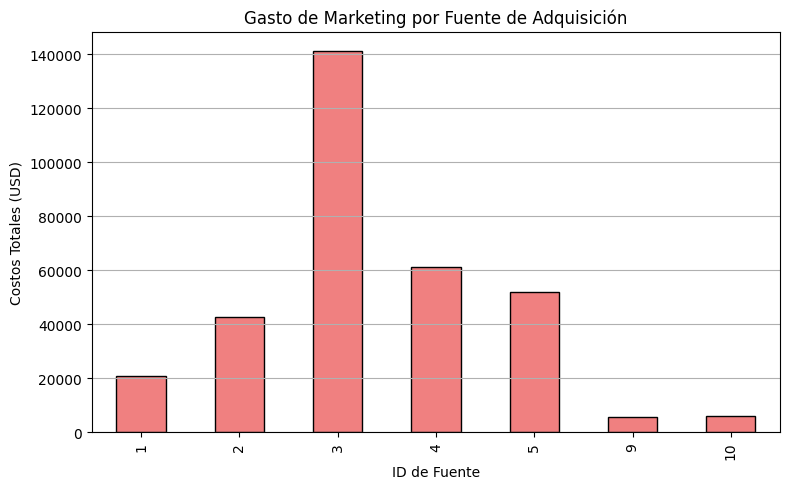

In [28]:
# Fuentes de anuncios 
plt.figure(figsize=(8,5))
gasto_por_fuente.sort_index().plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Gasto de Marketing por Fuente de Adquisición')
plt.xlabel('ID de Fuente')
plt.ylabel('Costos Totales (USD)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


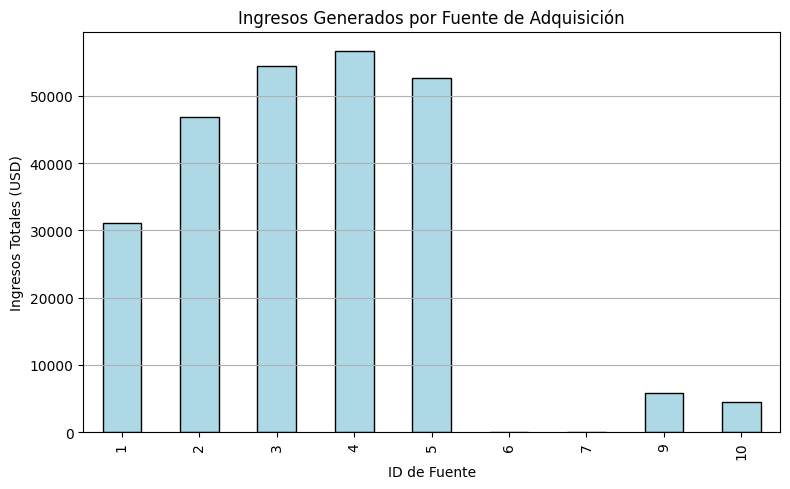

In [29]:
# Ingresos totales por fuente
plt.figure(figsize=(8,5))
ingresos_por_fuente.sort_index().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Ingresos Generados por Fuente de Adquisición')
plt.xlabel('ID de Fuente')
plt.ylabel('Ingresos Totales (USD)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Muy buena manera de comparar los gastos contra los ingresos, esta es información muy útil para generar una retrospectiva y mejorar las estrategias del equipo de marketing
</div>


### Cambios a lo largo del tiempo

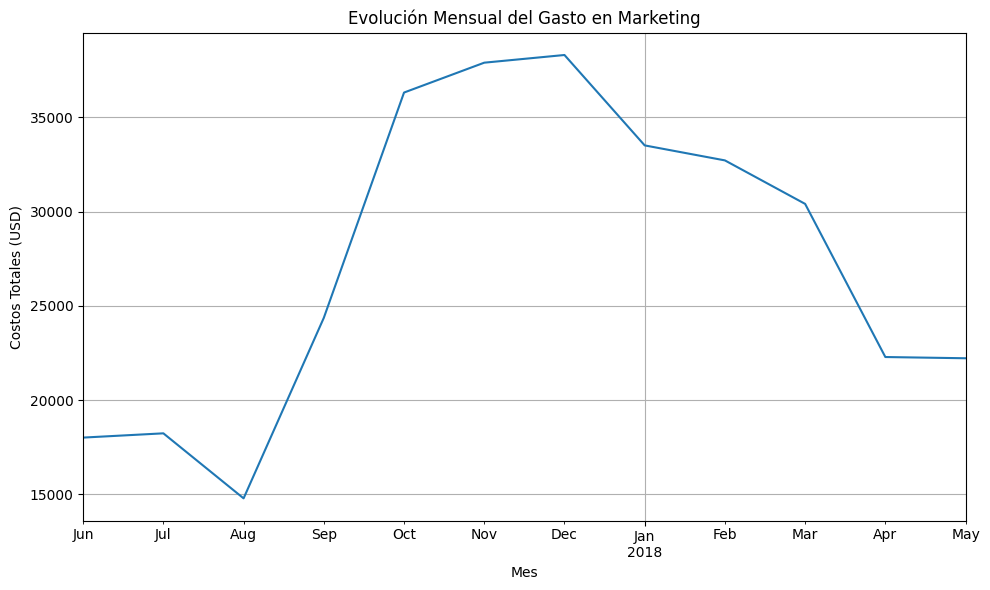

In [30]:
# Evolución del gasto de marketing por mes
plt.figure(figsize=(10,6))
gasto_por_mes.plot()
plt.title('Evolución Mensual del Gasto en Marketing')
plt.xlabel('Mes')
plt.ylabel('Costos Totales (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


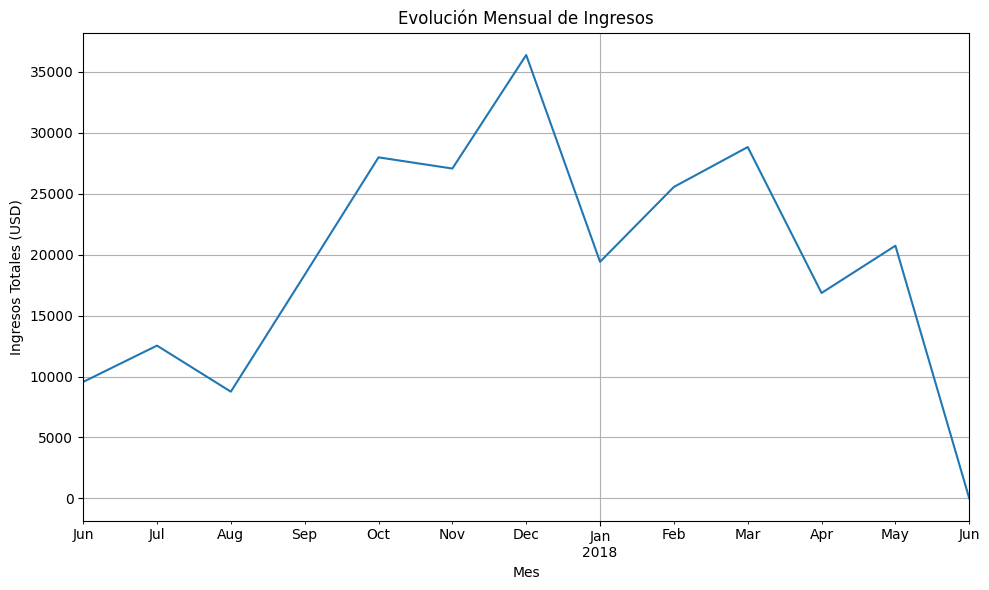

In [31]:
# Evolución de ingresos por mes
ordenes['Buy Ts'] = pd.to_datetime(ordenes['Buy Ts'])
ordenes['mes'] = ordenes['Buy Ts'].dt.to_period('M')
ingresos_por_mes = ordenes.groupby('mes')['Revenue'].sum()

plt.figure(figsize=(10,6))
ingresos_por_mes.plot()
plt.title('Evolución Mensual de Ingresos')
plt.xlabel('Mes')
plt.ylabel('Ingresos Totales (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()


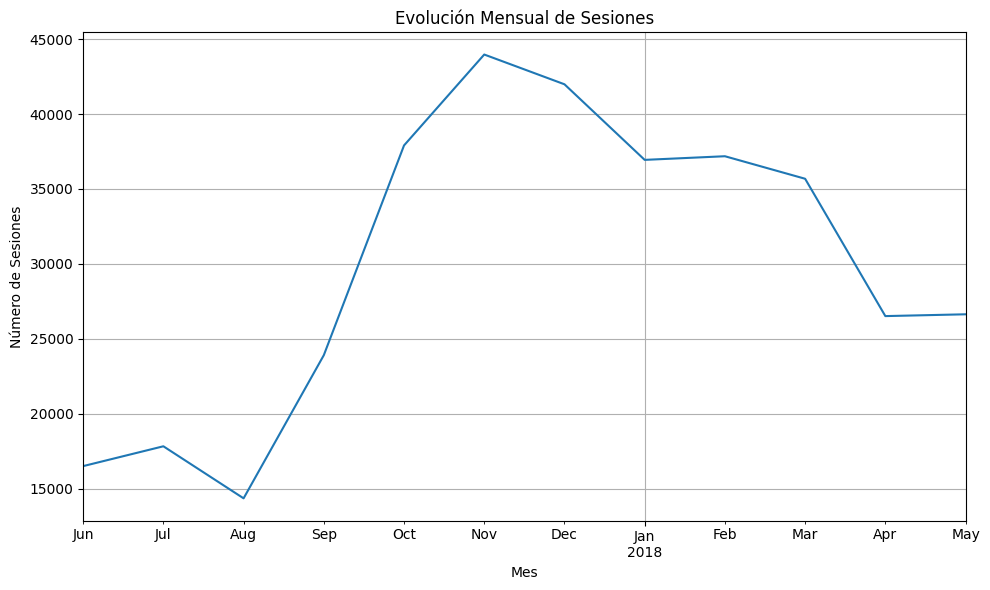

In [32]:
# Evolución de sesiones por mes
visitas['Start Ts'] = pd.to_datetime(visitas['Start Ts'])
visitas['mes'] = visitas['Start Ts'].dt.to_period('M')
sesiones_por_mes = visitas.groupby('mes').size()

plt.figure(figsize=(10,6))
sesiones_por_mes.plot()
plt.title('Evolución Mensual de Sesiones')
plt.xlabel('Mes')
plt.ylabel('Número de Sesiones')
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
# Código del revisor
sesiones_por_mes.index = sesiones_por_mes.index.to_timestamp()
ingresos_por_mes.index = ingresos_por_mes.index.to_timestamp()
gasto_por_mes.index = gasto_por_mes.index.to_timestamp()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Es importante tener los tipos de dato correctos para las graficas que queremos hacer
</div>


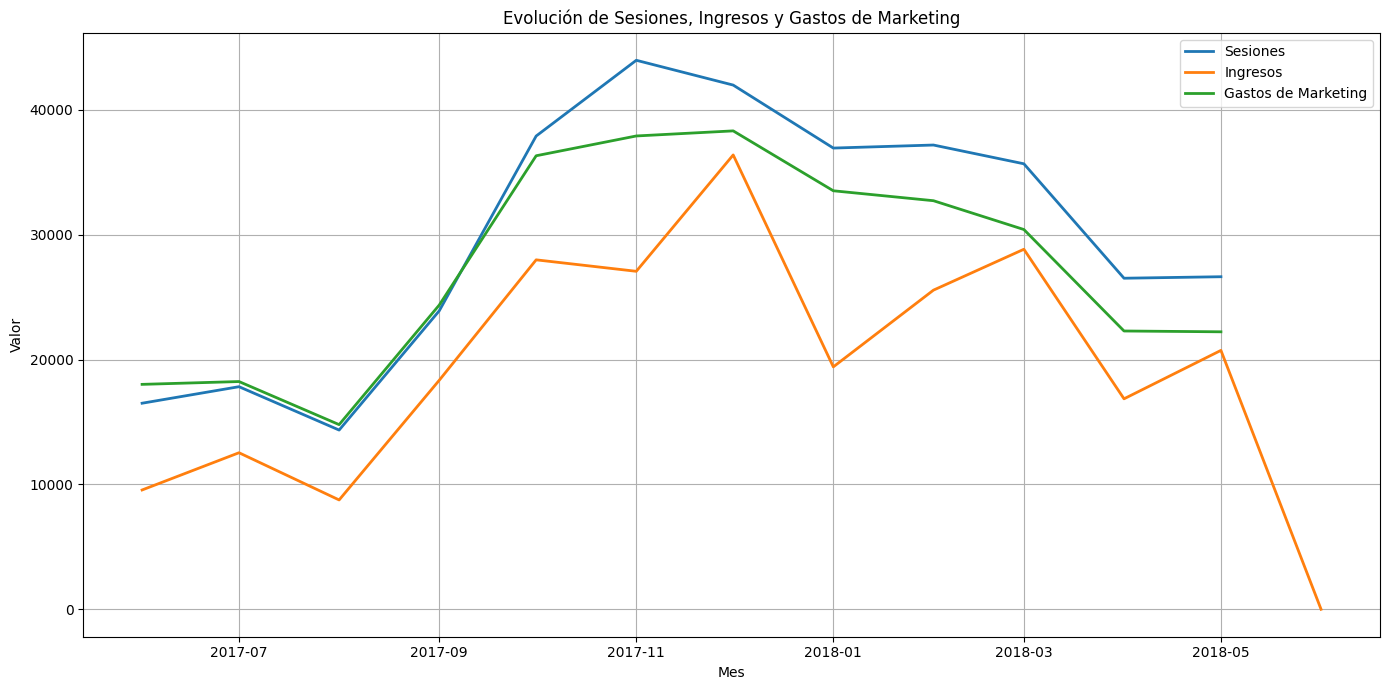

In [42]:
# Gráfico combinado (gastos, ingresos y sesiones)

plt.figure(figsize=(14, 7))

plt.plot(sesiones_por_mes, label='Sesiones', linewidth=2)
plt.plot(ingresos_por_mes, label='Ingresos', linewidth=2)
plt.plot(gasto_por_mes, label='Gastos de Marketing', linewidth=2)

plt.title('Evolución de Sesiones, Ingresos y Gastos de Marketing')
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1. Relación entre sesiones, gastos e ingresos:
A lo largo del tiempo, las sesiones y los gastos de marketing crecen de forma bastante sincronizada.

El aumento de inversión en marketing (gastos) coincide con un aumento en el tráfico (sesiones) y también en los ingresos.

Esto sugiere que las campañas de marketing fueron efectivas inicialmente en atraer más usuarios y generar más ventas.

2. Picos máximos:
El tráfico (sesiones) y los ingresos alcanzaron su pico entre octubre y diciembre de 2017.

El gasto en marketing también alcanzó su punto más alto en ese periodo, lo que muestra una clara correlación entre mayor inversión y mayor volumen de actividad e ingresos.

3. Caída posterior:
A partir de enero de 2018, se observa una reducción progresiva en gastos, sesiones e ingresos.

La caída de ingresos es más pronunciada que la caída en sesiones, especialmente a inicios de 2018, lo que podría indicar:

Usuarios menos propensos a comprar.

Efectividad reducida de las campañas.

Cambios en la calidad del tráfico.

4. Observaciones específicas:
Hay un desfase leve entre el gasto de marketing y los ingresos en algunos meses, lo que puede reflejar que los resultados de las campañas no son inmediatos.

Al final del periodo, aunque los gastos se mantuvieron bajos, las sesiones también disminuyen, mostrando dependencia del tráfico hacia el gasto publicitario.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Las observaciones que haces me parecen acertadas, podemos ver una clara relación entre los gastos de marketing y la obtención de mayores ingresos
</div>


# Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

Recomendación:
Con base en los análisis realizados, se recomienda mantener o incluso aumentar moderadamente la inversión publicitaria en las fuentes de adquisición que demostraron ser más rentables en términos de ROMI (Return on Marketing Investment) y bajo Costo de Adquisición de Cliente (CAC).
La inversión mensual debería ajustarse para sostener un nivel alto de sesiones y evitar las caídas de ingresos observadas tras disminuir los gastos de marketing a partir de 2018.

Fuentes recomendadas:
Fuente 1: Es la más rentable (ROMI = +0.49) a pesar de tener un CAC de $2.20 USD, ligeramente superior al de otras fuentes. Demostró una excelente conversión de usuarios en clientes y retornó casi el 50% adicional sobre lo invertido.

Fuente 4, 9 y 10: También son recomendadas ya que presentan bajos costos de adquisición (CAC ≈ $0.84 - $0.85 USD), lo que las hace eficientes para generar volumen de usuarios a bajo costo, aunque su rentabilidad neta fue más moderada que en Fuente 1.

Métricas clave utilizadas para fundamentar la recomendación:
ROMI (Return on Marketing Investment): Para medir la rentabilidad real de cada fuente. Evaluamos qué tan rentable fue cada dólar invertido en publicidad.

CAC (Costo de Adquisición de Clientes): Para entender cuánto cuesta conseguir cada cliente según la fuente de tráfico.

Ingresos generados por fuente: Para comprobar qué fuentes no solo atraen usuarios sino usuarios que realmente compran.

Volumen de sesiones e ingresos en el tiempo: Para identificar cómo la variación en inversión afecta el tráfico y los resultados de ventas.

Conclusiones basadas en el análisis de métricas:
Fuente 1 sobresale tanto en retorno (ROMI) como en generación de ingresos, por lo cual debería recibir la mayor prioridad en la inversión.

Fuentes 4, 9 y 10 deben complementarse con inversiones estratégicas para atraer volumen de usuarios a bajo costo, ya que mantienen CAC bajo.

Fuentes 3 y 10 mostraron ROMI negativo, indicando que generan pérdidas; se recomienda reducir o suspender la inversión en ellas, o investigar mejoras específicas antes de continuar invirtiendo.

Se comprobó que el gasto en marketing tiene una alta correlación positiva con el crecimiento de tráfico (sesiones) e ingresos, por lo cual se debe mantener una inversión constante para no perder impulso en ventas.

Resumen final:
Se recomienda enfocar el presupuesto principalmente en Fuente 1, complementándolo con Fuente 4 y Fuente 9.
Además, mantener un monitoreo mensual de ROMI y CAC para ajustar las estrategias dinámicamente conforme al comportamiento real de usuarios y ventas.

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta d eque se han aplicado los conocimientos adquiridos durante el Sprint.

Pienso que te has enfocado en los aspectos importantes y has realizado un proyecto sencillo pero muy bien explicado.

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>
